## <center> Business Case: Yulu - Hypothesis Testing</center>

### About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
<br>Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!
<br>Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### Business problem

The company wants to know:
 >Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
 >How well those variables describe the electric cycle demands

### Column Profiling:

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
    - 1: Clear, Few clouds, partly cloudy, partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

### Problem Statement
- Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
- Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)
- Select an appropriate test to check whether:
 - Working Day has effect on number of electric cycles rented
 - No. of cycles rented similar or different in different seasons
 - No. of cycles rented similar or different in different weather
 - Weather is dependent on season (check between 2 predictor variable)
- Set up Null Hypothesis (H0)
- State the alternate hypothesis (H1)
- Set a significance level (alpha)
- Calculate test Statistics.
- Decision to accept or reject null hypothesis.
- Inference from the analysis

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from scipy.stats import norm

### Reading dataset

In [2]:
df=pd.read_csv('bike_sharing.csv')

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### Shape of the data.

In [4]:
df.shape

(10886, 12)

### First ten rows of the dataset.

In [5]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


### Different attributes in dataset.

In [6]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### Checking for duplicates values.

In [7]:
df.duplicated().value_counts()

False    10886
dtype: int64

### Datatypes of the attributes

In [8]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

### Viewing the overall information about the data.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Converting object data types to date time

In [10]:
df['datetime']=pd.to_datetime(df['datetime'])

In [11]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

## Basic Data Exploration

### Total number of unique values in each columns of the dataset

In [12]:
for i in df.columns:
    print(i,':',df[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


### Count of values in each columns. 

In [13]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [14]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [15]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [16]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [17]:
df['temp'].value_counts().head()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
Name: temp, dtype: int64

In [18]:
df['atemp'].value_counts().head()

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
Name: atemp, dtype: int64

In [19]:
df['humidity'].value_counts().head()

88    368
94    324
83    316
87    289
70    259
Name: humidity, dtype: int64

In [20]:
df['windspeed'].value_counts().head()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
Name: windspeed, dtype: int64

In [21]:
df['casual'].value_counts().head()

0    986
1    667
2    487
3    438
4    354
Name: casual, dtype: int64

In [22]:
df['registered'].value_counts().head()

3    195
4    190
5    177
6    155
2    150
Name: registered, dtype: int64

In [23]:
df['count'].value_counts().head()

5    169
4    149
3    144
6    135
2    132
Name: count, dtype: int64

### The statistical summary of numerical values in the dataset

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


### Analysing the correlation between each columns.

In [25]:
data_correlation=df.corr()
data_correlation

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


### Count of null values in dataset

### Separating the columns into Categorical columns And Numerical columns.

In [26]:
cat_columns=df.dtypes=='object'
category=list(cat_columns[cat_columns].index)

In [27]:
category_data=df[category]
category_data

""
0
1
2
3
4
...
10881
10882
10883
10884


In [28]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### Find outliers in the numerical variables

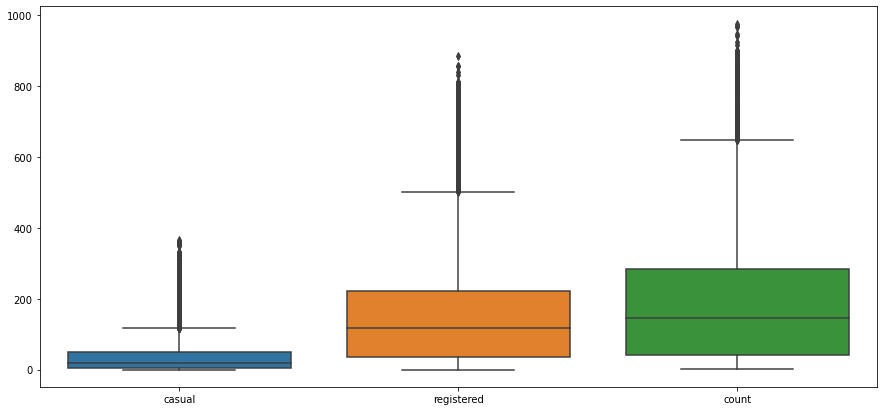

In [29]:
plt.figure(figsize=(15,7))
attrs=['casual','registered','count']
sns.boxplot(data=df[['casual','registered','count']])
plt.show()

In [30]:
da=df.copy()
attrs=['casual','registered','count']
for i in attrs:
    q1=df[i].quantile(.25)
    q3=df[i].quantile(.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    print('lower limit of',i,'=',lower)
    print('upper limit of',i,'=',upper)
    print('----------------------------------------------------------------')
    da=da[~((da[i]<lower)|(da[i]>upper))]
da

lower limit of casual = -63.5
upper limit of casual = 116.5
----------------------------------------------------------------
lower limit of registered = -243.0
upper limit of registered = 501.0
----------------------------------------------------------------
lower limit of count = -321.0
upper limit of count = 647.0
----------------------------------------------------------------


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### Data Visualization

### No of holidays without saturdays and sundays.

In [31]:
df.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

<AxesSubplot:>

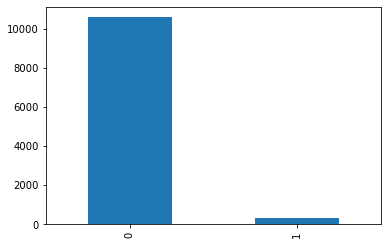

In [32]:
df.holiday.value_counts().plot(kind='bar')

<b>Insights :
###### --->  From the above observation we can say that No.of holidays are only 311

### No of holidays and working days

In [33]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

<AxesSubplot:>

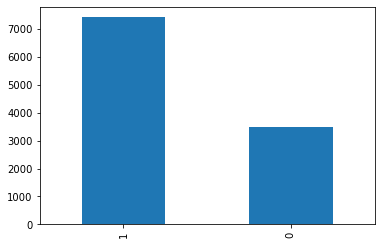

In [34]:
df.workingday.value_counts().plot(kind='bar')

<b>Insights :
###### --->  From the above observation we can say that number of holidays are almost half of working days.

### Number of user counts in holidays without saturdays and sundays.

In [35]:
x=df.groupby('holiday')['count'].mean()
x

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

<AxesSubplot:xlabel='holiday'>

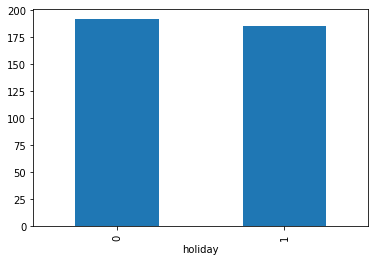

In [36]:
x.plot(kind='bar')

<b>Insights :
###### --->  From the above observation we can say that mean users are slightly less in holidays 

### No of user counts in holidays and working days.

In [37]:
y= df.groupby('workingday')['count'].mean()
y

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

<AxesSubplot:xlabel='workingday'>

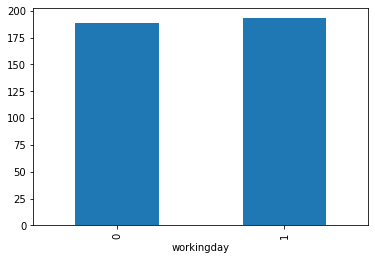

In [38]:
y.plot(kind='bar')

<b>Insights :
###### --->  From the above observation we can say that mean users are slightly higher in workingdays. 

### Dependance of weather on total user count.

In [39]:
x1=df.groupby('weather')['count'].sum().reset_index()
x1

,weather,count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


In [40]:
y1=df.groupby('weather')['count'].mean().reset_index()
y1

,weather,count
0,1,205.236791
1,2,178.955540
2,3,118.846333
3,4,164.000000


<AxesSubplot:xlabel='weather', ylabel='count'>

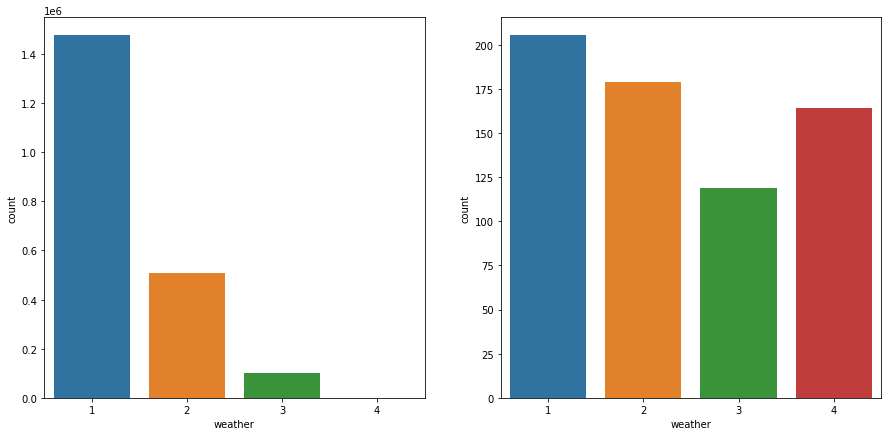

In [41]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='weather',y='count',data=x1)
plt.subplot(122)
sns.barplot(x='weather',y='count',data=y1)

## Dependance of season on total user count.

In [42]:
x2=df.groupby('season')['count'].sum().reset_index()
x2

,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


In [43]:
y2=df.groupby('season')['count'].mean().reset_index()
y2

,season,count
0,1,116.343261
1,2,215.251372
2,3,234.417124
3,4,198.988296


<AxesSubplot:xlabel='season', ylabel='count'>

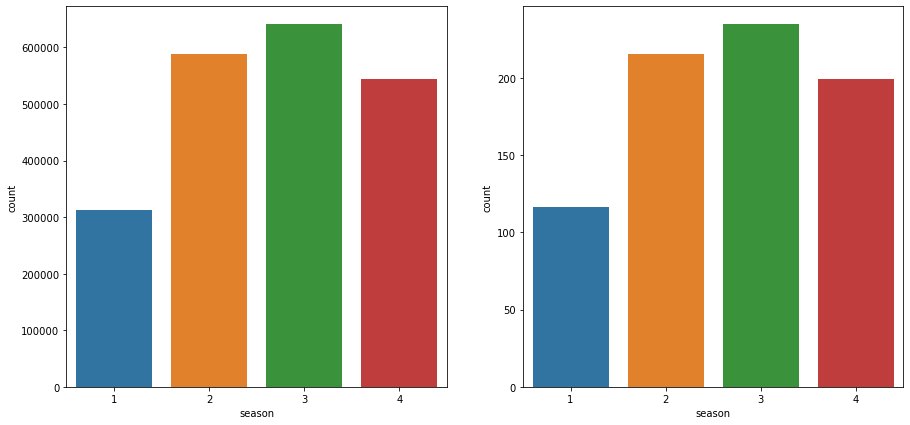

In [44]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='season',y='count',data=x2)
plt.subplot(122)
sns.barplot(x='season',y='count',data=y2)

<b>Insights :
###### --->  From the above observation we can say that:-
- ><b>Number of users during season 2,3,4 is almost same.
- ><b>Season 3 has the highest number of users.
- ><b>Number of users during season 1 is the lowest.

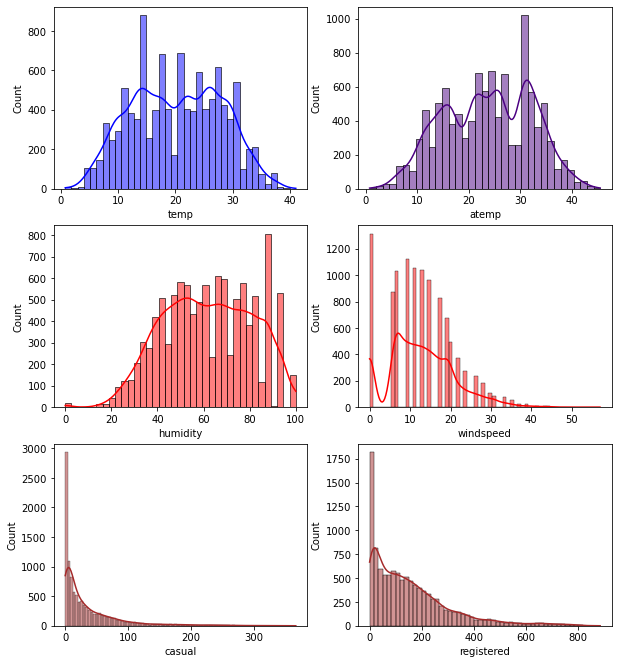

In [45]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
fig.subplots_adjust(top=1.2)
sns.histplot(data=df, x="temp", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=df, x="atemp", kde=True,color="indigo", ax=axis[0,1])
sns.histplot(data=df, x="humidity", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=df, x="windspeed", kde=True,color="red", ax=axis[1,1])
sns.histplot(data=df, x="casual", kde=True,color="brown", ax=axis[2,0])
sns.histplot(data=df, x="registered", kde=True,color="brown", ax=axis[2,1])
plt.show()

<b>Insights :
###### ---> From the above observations we can say that :-
- ><b>Most of the values in temprature lies in range of 10 - 40.
- ><b>Most of the values in atemp lies in range of 5 - 35.
- ><b>Most of the values in humidity percentage lies in 30 -100
- ><b>Most of the values in windspeed lies in range of 5 - 30.
- ><b>Most of the values in casual users lies in 0 - 100
- ><b>Most of the values in registered users lies in range of 0 - 400.

### Dependance of temp on total user count

In [46]:
x3=df.groupby('temp')['count'].sum().reset_index()
x3

,temp,count
0,0.82,544
1,1.64,183
2,2.46,215
3,3.28,212
4,4.10,2212
5,4.92,3505
6,5.74,5696
7,6.56,9944
8,7.38,7182
9,8.20,18777


In [47]:
y3=df.groupby('temp')['count'].mean().reset_index()
y3

,temp,count
0,0.82,77.714286
1,1.64,91.500000
2,2.46,43.000000
3,3.28,19.272727
4,4.10,50.272727
5,4.92,58.416667
6,5.74,53.233645
7,6.56,68.109589
8,7.38,67.754717
9,8.20,81.995633


<AxesSubplot:xlabel='temp', ylabel='count'>

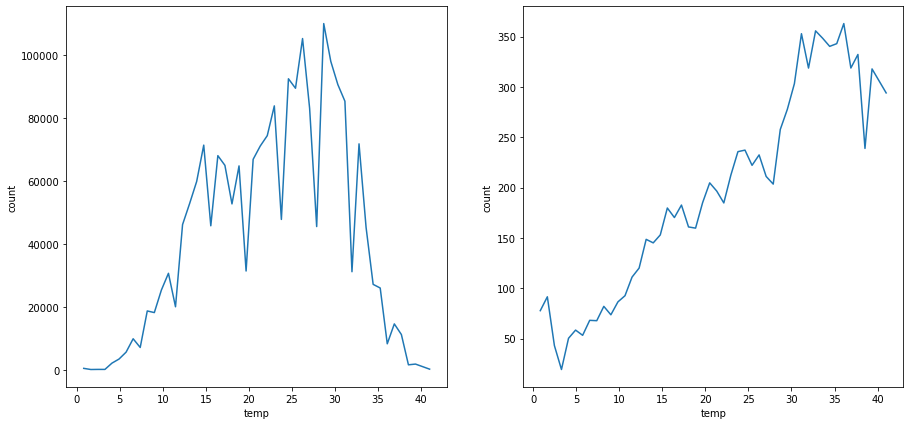

In [48]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.lineplot(x='temp',y='count',data=x3)
plt.subplot(122)
sns.lineplot(x='temp',y='count',data=y3)

<b>Insights :
###### ---> From the above observations we can say that :-
- ><b>At lower temprature number of users are very low
- ><b>Most of the users are in the temp range of 25 to 40
- ><b>There is a gradual increse of number of users with increase in temperature

### Dependance of atemp on total user count

In [49]:
x4=df.groupby('atemp')['count'].sum().reset_index()
x4

,atemp,count
0,0.760,2
1,1.515,3
2,2.275,266
3,3.030,576
4,3.790,625
5,4.545,727
6,5.305,1580
7,6.060,4736
8,6.820,3552
9,7.575,4195


In [50]:
y4=df.groupby('atemp')['count'].mean().reset_index()
y4

,atemp,count
0,0.760,1.000000
1,1.515,3.000000
2,2.275,38.000000
3,3.030,82.285714
4,3.790,39.062500
5,4.545,66.090909
6,5.305,63.200000
7,6.060,64.876712
8,6.820,56.380952
9,7.575,55.933333


<AxesSubplot:xlabel='atemp', ylabel='count'>

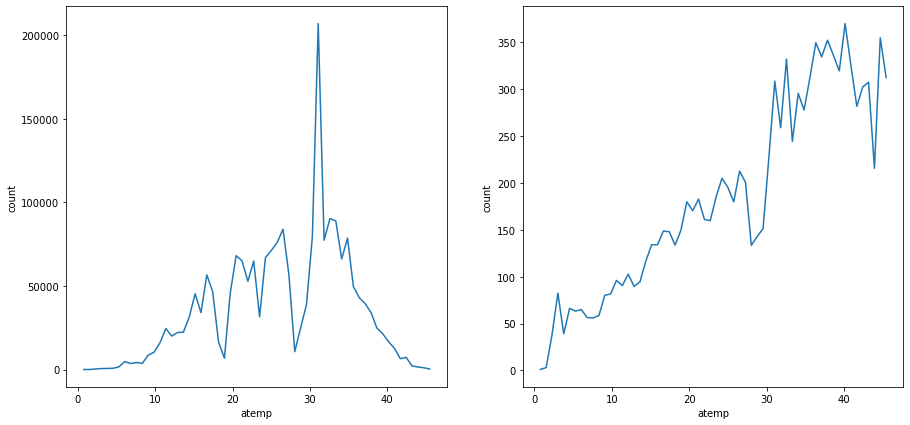

In [51]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.lineplot(x='atemp',y='count',data=x4)
plt.subplot(122)
sns.lineplot(x='atemp',y='count',data=y4)

<b>Insights :
###### ---> From the above observations we can say that :-
- ><b>At lower atemprature number of users are very low
- ><b>Most of the users are in the atemp range of 30 to 40
- ><b>There is a gradual increase of no of users with increase in temperature

### Dependance of humidity on total user count

In [52]:
x5=df.groupby('humidity')['count'].sum().reset_index()
x5

,humidity,count
0,0,623
1,8,77
2,10,107
3,12,29
4,13,17
...,...,...
84,93,14586
85,94,28666
86,96,71
87,97,64


In [53]:
y5=df.groupby('humidity')['count'].mean().reset_index()
y5

,humidity,count
0,0,28.318182
1,8,77.000000
2,10,107.000000
3,12,29.000000
4,13,17.000000
...,...,...
84,93,71.151220
85,94,88.475309
86,96,71.000000
87,97,64.000000


<AxesSubplot:xlabel='humidity', ylabel='count'>

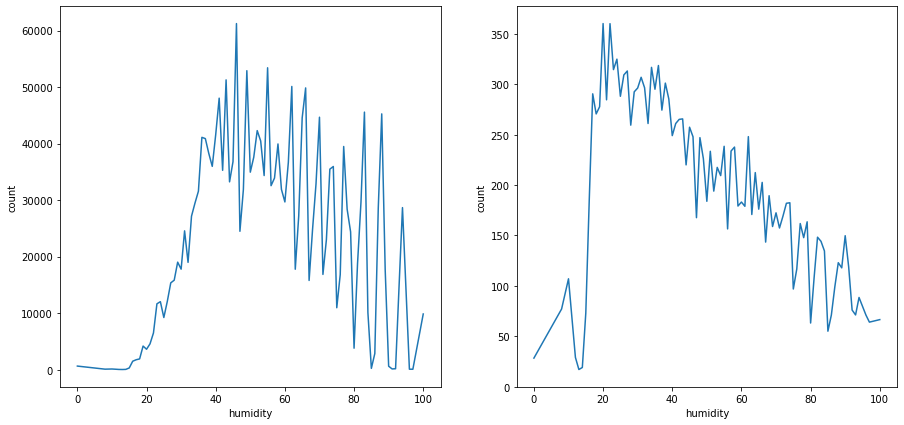

In [54]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.lineplot(x='humidity',y='count',data=x5)
plt.subplot(122)
sns.lineplot(x='humidity',y='count',data=y5)

<b>Insights :
###### ---> From the above observations we can say that :-
- ><b>At lower and higher humidity number of users are very low.
- ><b>Most of the users are in the humidity range of 30 to 50.
- ><b>Higher mean count of the users are in the humidity range of 20 to 40.
- ><b>There is a gradual decrease of no of users with increase in humidity.

### Dependance of windspeed on totel user count

In [55]:
x6=df.groupby('windspeed')['count'].sum().reset_index()
x6

,windspeed,count
0,0.0000,211526
1,6.0032,128938
2,7.0015,175627
3,8.9981,196723
4,11.0014,213791
5,12.9980,210744
6,15.0013,202611
7,16.9979,177034
8,19.0012,147403
9,19.9995,110816


In [56]:
y6=df.groupby('windspeed')['count'].mean().reset_index()
y6

,windspeed,count
0,0.0000,161.101295
1,6.0032,147.864679
2,7.0015,169.852031
3,8.9981,175.645536
4,11.0014,202.262062
5,12.9980,202.249520
6,15.0013,210.833507
7,16.9979,214.847087
8,19.0012,218.051775
9,19.9995,225.235772


<AxesSubplot:xlabel='windspeed', ylabel='count'>

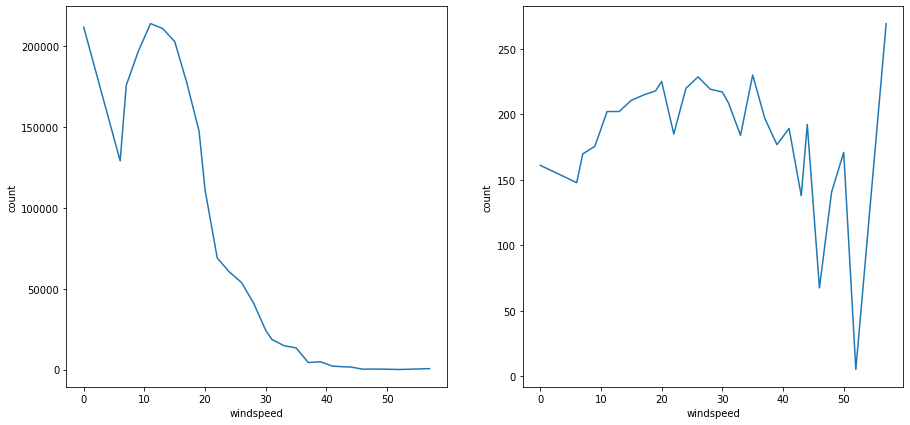

In [57]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.lineplot(x='windspeed',y='count',data=x6)
plt.subplot(122)
sns.lineplot(x='windspeed',y='count',data=y6)

<b>Insights :
###### ---> From the above observations we can say that :-
- ><b>At higher windspeed number of users are very low.
- ><b>Most of the users are in the windspeed range of 0 to 25.
- ><b>Mean count of the users are in the windspeed range of 0 to 40.
- ><b>There is a uniform distribution of user count across all windspeed.

### Adding new features like year,month,day from date time column.

In [58]:
data=df.copy()

In [59]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month_name()
data['day'] = data['datetime'].dt.day
data['day_name'] = data['datetime'].dt.day_name()
data['hour'] = data['datetime'].dt.hour
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,day_name,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,January,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,January,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,January,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,January,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,January,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,December,19,Wednesday,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,December,19,Wednesday,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,December,19,Wednesday,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,December,19,Wednesday,22


### No of user count in each weekdays

In [60]:
x1=data.groupby('day_name')['count'].mean().to_frame('mean').reset_index()
x1

,day_name,mean
0,Friday,197.844343
1,Monday,190.390716
2,Saturday,196.665404
3,Sunday,180.839772
4,Thursday,197.296201
5,Tuesday,189.723847
6,Wednesday,188.411348


[]

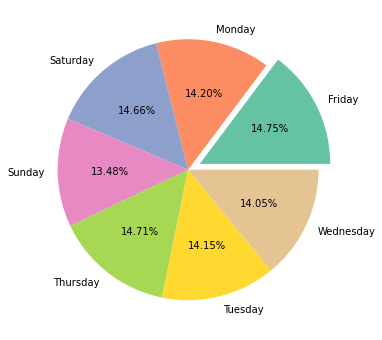

In [61]:
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set2')
plt.pie(data=x1, x=x1['mean'], colors=palette_color, labels=x1['day_name'], explode=(0.1,0,0,0,0,0,0), autopct='%0.2f%%')
plt.plot()

<b>Insights :
###### --->  From the above observation we can say that :-
- > <b>We can see that almost every day no.of users are same
- > <b>Most and leat mean users are in respective days are friday and sunday

### No of user count in each month.

In [62]:
data.groupby('month')['count'].mean().to_frame('mean').reset_index()

,month,mean
0,April,184.160616
1,August,234.118421
2,December,175.614035
3,February,110.003330
4,January,90.366516
5,July,235.325658
6,June,242.031798
7,March,148.169811
8,May,219.459430
9,November,193.677278


<AxesSubplot:xlabel='month'>

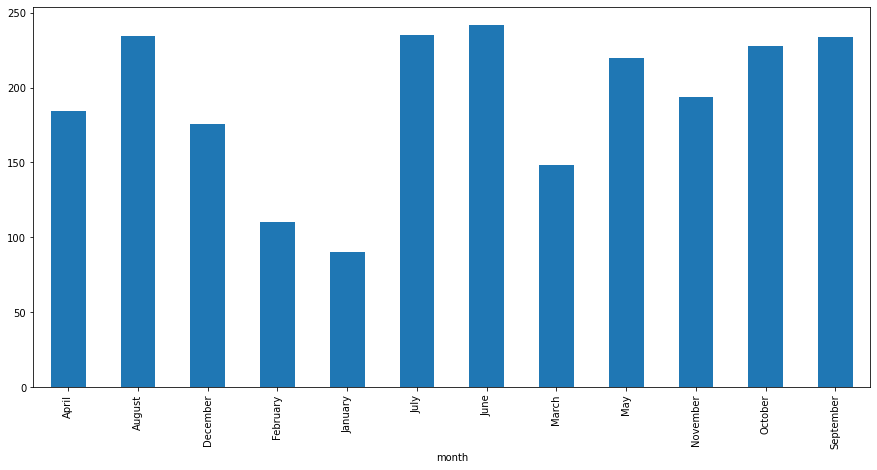

In [63]:
plt.figure(figsize=(15,7))
data.groupby('month')['count'].mean().plot(kind='bar')

<b>Insights :
###### --->  From the above observation we can say that :-
- > <b>June,July and August month are the most bike using months
- > <b>January & February are the least

### Relationship between temperature and humidity with users

[Text(0.5, 1.0, 'Relation between humidity and users')]

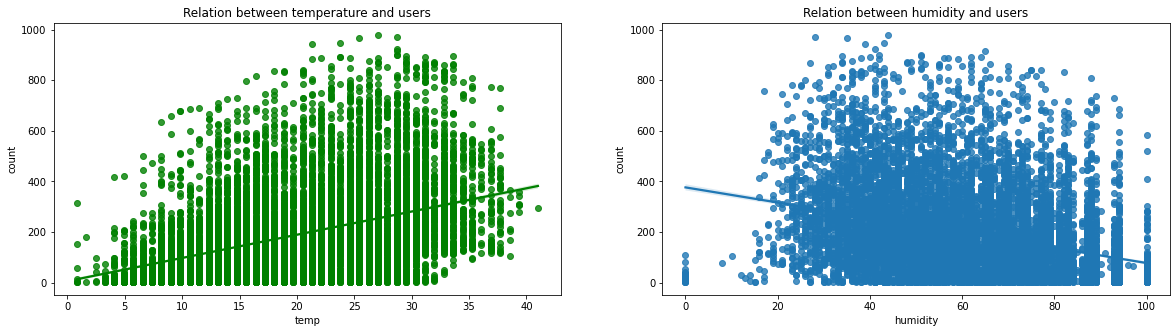

In [64]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.regplot(x=df['temp'], y=df['count'], ax=ax1 ,color='green')
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

### Number of users across weather in working days.

<AxesSubplot:xlabel='weather', ylabel='count'>

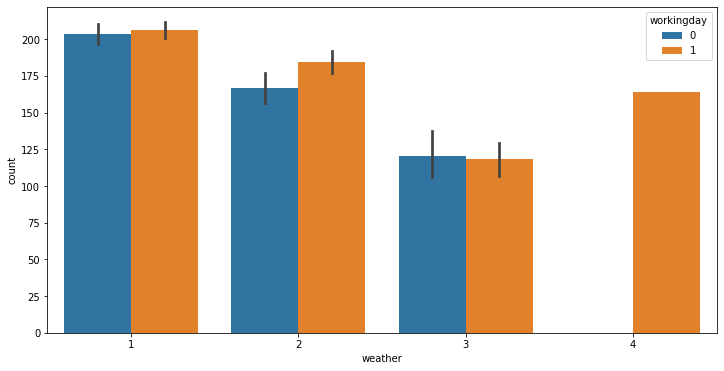

In [65]:
plt.figure(figsize=(12,6))
sns.barplot(data=data,y='count',x='weather',hue='workingday')

<b>Insights :
###### --->  From the above observation we can say that In every weather conditions working days have most number of users.

### No.of users across every season in working days.

<AxesSubplot:xlabel='season', ylabel='count'>

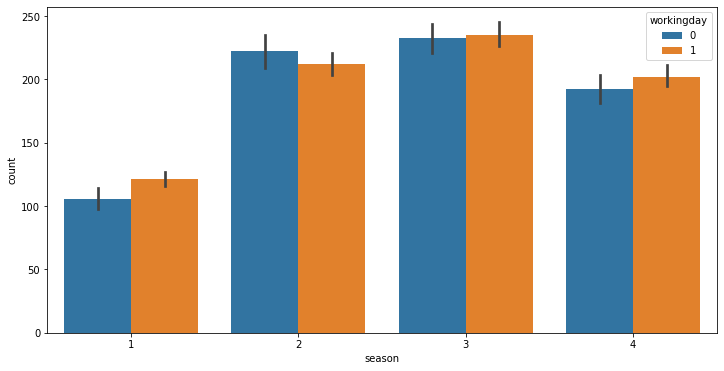

In [66]:
plt.figure(figsize=(12,6))
sns.barplot(data=data,y='count',x='season',hue='workingday')

<b>Insights :
###### --->  From the above observation we can say that :-
- ><b>Season 1,3,4 working days have most number of users.
- ><b>In Season 2 holidays have most number of users.

### Number of users across every season in different year.

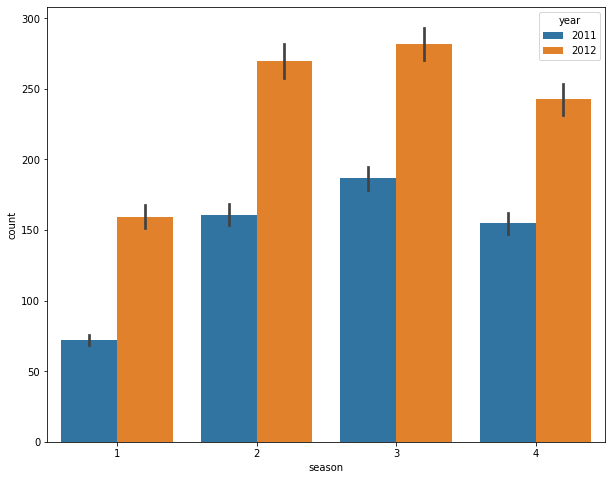

In [67]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='count',hue='year',data=data)
plt.show()

<b>Insights :
###### --->  From the above observation we can say that :-
- ><b>In every season with increase in year number of users are increasing.
- ><b>In season 1 almost double the users compare to previous year.

### Number of users across every season in casual and registered users.

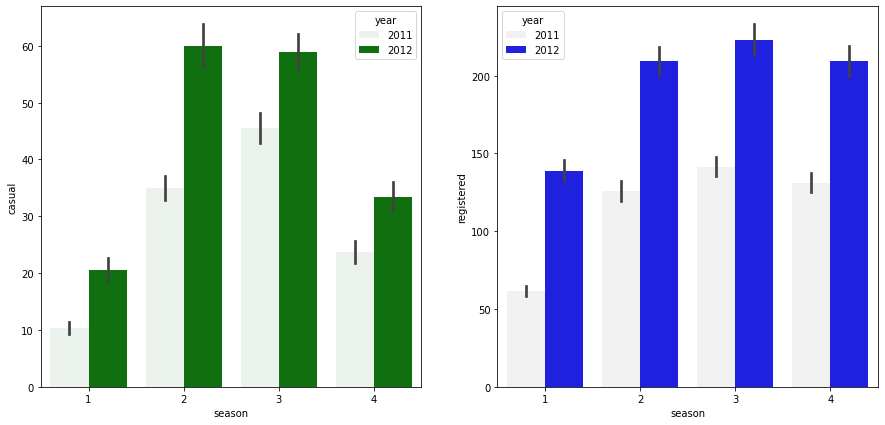

In [68]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='season',y='casual',hue='year',data=data,color='green')
plt.subplot(122)
sns.barplot(x='season',y='registered',hue='year',data=data,color='blue')
plt.show()

<b>Insights :
###### --->  From the above observation we can say that both registerd and casual users are increase with increse in year in every seasons.

### Temperature varies across different month in each season.

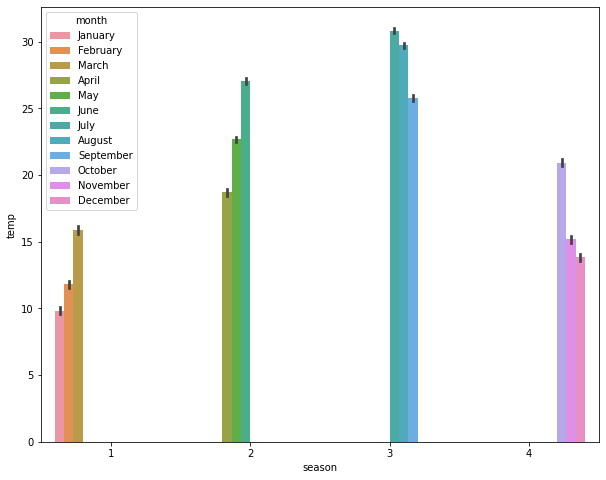

In [69]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='temp',hue='month',data=data)
plt.show()

<b>Insights :
###### --->  From the above observation we can say that :-
- <b>Season 3 is the highest temprature seasons
 ><b>June,July,August
- <b>Season 1 is the lowest temprature seasons
 ><b>January,February,March

### Number of users varies across diffrent month in each season.

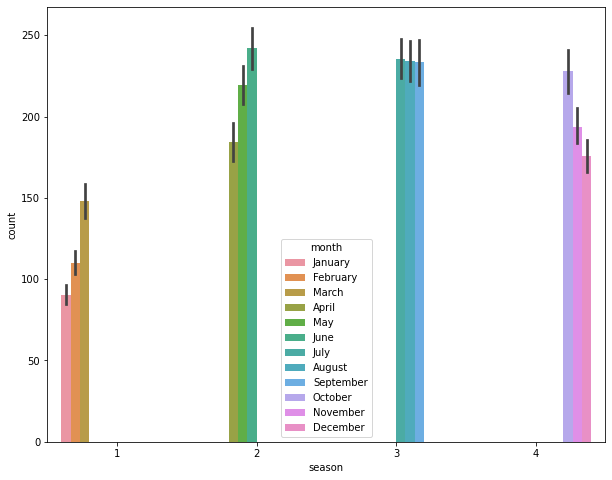

In [70]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='count',hue='month',data=data)
plt.show()

<b>Insights :
###### --->  From the above observation we can say that :-
- ><b>Season 2,3,4 has the highest bike user count seasons.
- ><b>Season 1 is the seasons with lowest bike user count.
> ><b>January,February,March

### Analysis based on working hours.

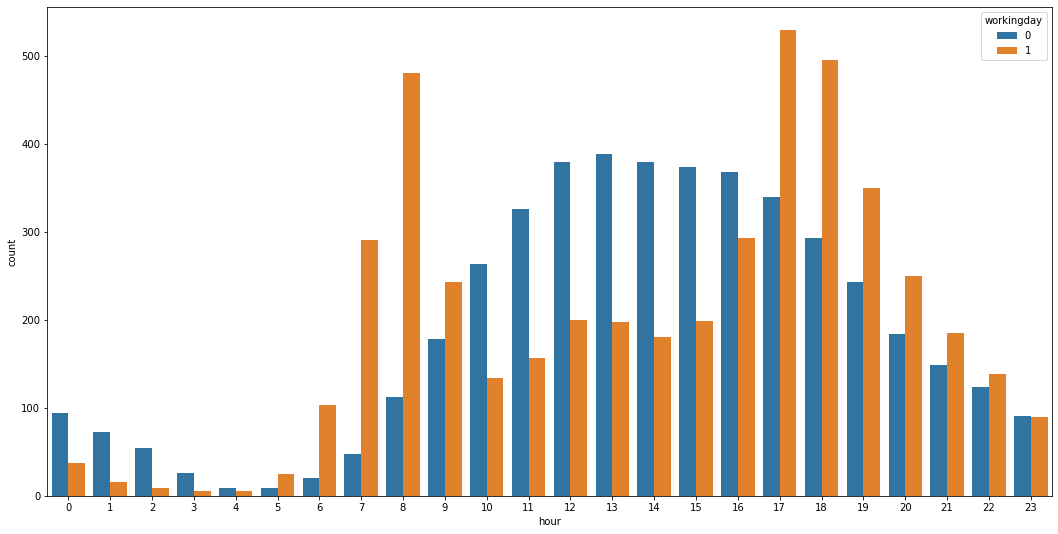

In [71]:
plt.figure(figsize=(18,9))
weekend = data.groupby(['hour', 'workingday'])['count'].mean().reset_index()
sns.barplot(data=weekend, x='hour', y='count', hue='workingday')
plt.show()

<b>Insights :
###### --->  From the above observation we can say that there are only a few users till 7AM.

### Analysis based on temperature and feeling temperature

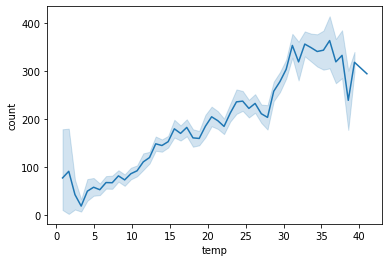

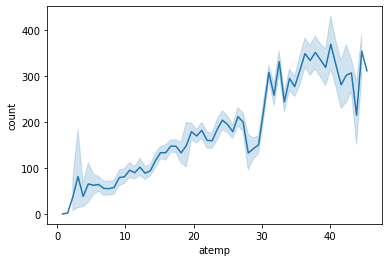

In [72]:
temp = data.groupby(['hour', 'temp'])['count'].mean().reset_index()
sns.lineplot(data=data, x='temp', y='count')
plt.show()
temp = data.groupby(['hour', 'atemp'])['count'].mean().reset_index()
sns.lineplot(data=data, x='atemp', y='count')
plt.show()

### No of user count for each temperature.

In [73]:
ds=data.groupby('temp')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
ds

,temp,count
0,36.08,362.869565
1,32.80,355.623762
2,31.16,352.801653
3,33.62,348.323077
4,35.26,342.934211
5,34.44,340.225000
6,37.72,332.176471
7,36.90,318.717391
8,31.98,318.683673
9,39.36,317.833333


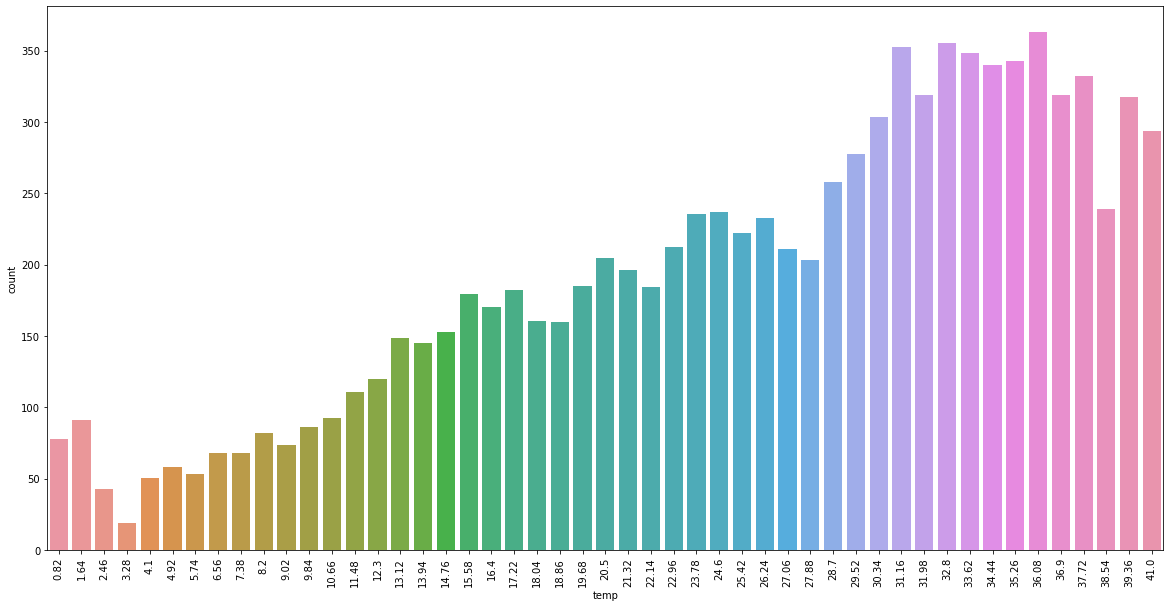

In [74]:
plt.figure(figsize=(20,10))
sns.barplot(x='temp',y='count',data=ds)
plt.xticks(rotation=90)
plt.show()

<b>Insights :
###### --->  From the above observation we can say that :-
- <b>More users prefer the temperature 36.08
- <b>The lowest number users comes for bikes is in the temperature 3.28

### No of user count for each atemp.

In [75]:
s=data.groupby('atemp')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
s

,atemp,count
0,40.150,369.577778
1,44.695,354.333333
2,37.880,351.835052
3,36.365,349.243902
4,38.635,335.783784
5,37.120,334.144068
6,32.575,331.746324
7,40.910,324.512821
8,39.395,319.194030
9,35.605,312.144654


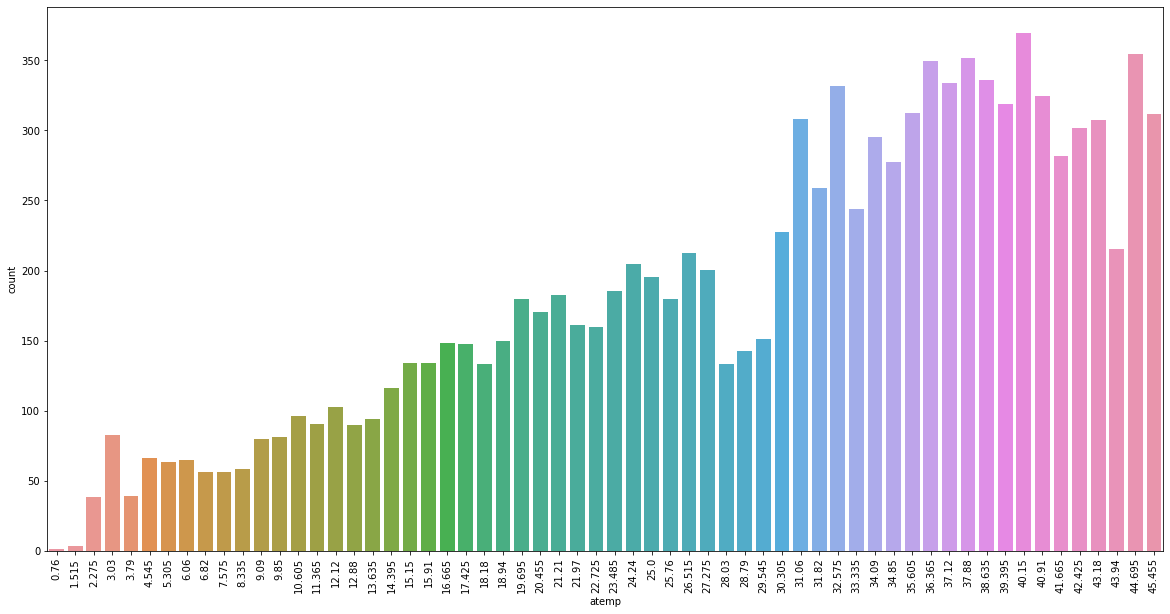

In [76]:
plt.figure(figsize=(20,10))
sns.barplot(x='atemp',y='count',data=s)
plt.xticks(rotation=90)
plt.show()

<b> Insights :
- <b> More people use bikes when they feel 40.15 temperature.

### No of user count for each humidity level

In [77]:
dh=df.groupby('humidity')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
dh

,humidity,count
0,20,360.200000
1,22,360.111111
2,24,324.891892
3,36,318.581395
4,34,316.741935
...,...,...
84,85,55.000000
85,12,29.000000
86,0,28.318182
87,14,19.000000


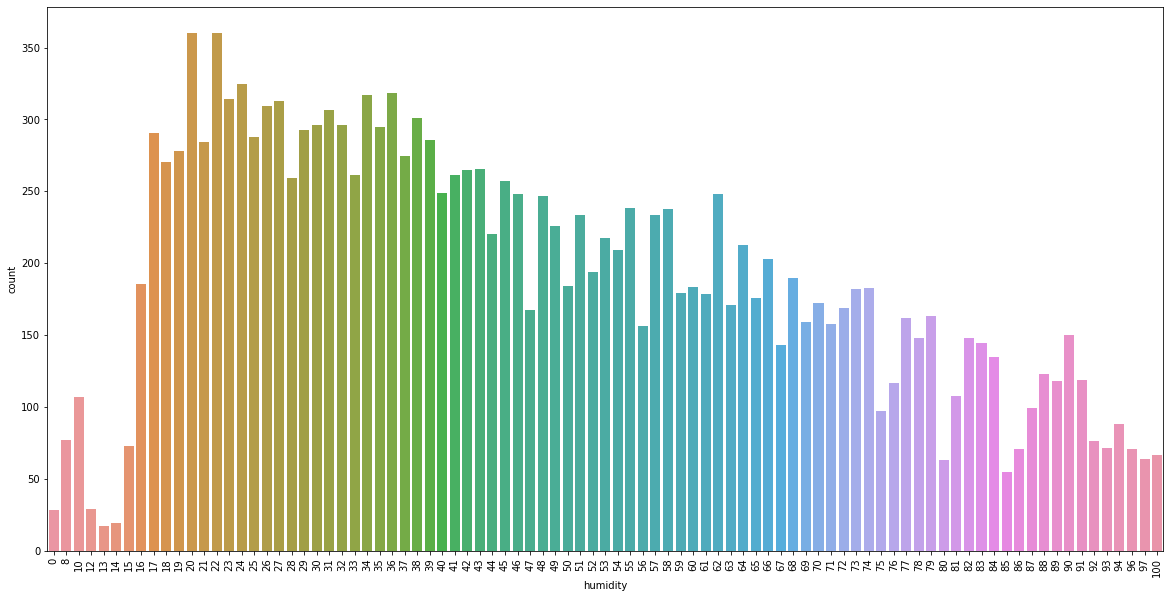

In [78]:
plt.figure(figsize=(20,10))
sns.barplot(x='humidity',y='count',data=dh)
plt.xticks(rotation=90)
plt.show()

<b> Insights :
- <b> More people use bikes when the humidity level is in between the range 17- 40

### No of user count for each windspeed level

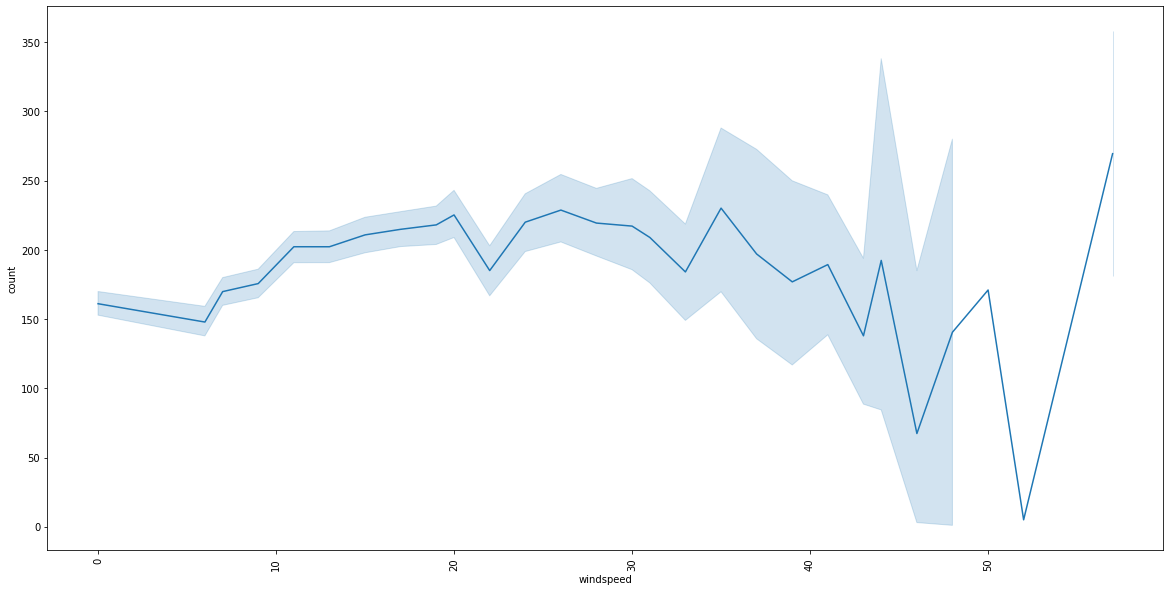

In [79]:
plt.figure(figsize=(20,10))
sns.lineplot(x='windspeed',y='count',data=df)
plt.xticks(rotation=90)
plt.show()

<b> Insights :
- <b> More people prefer wind speed is greater than 50

### Correlation

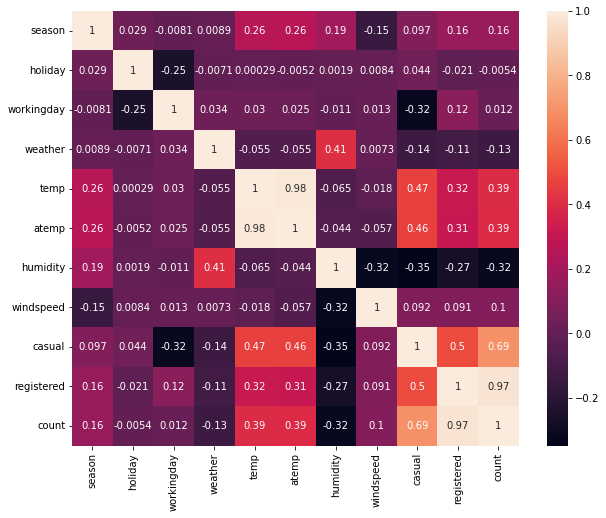

In [80]:
plt.figure(figsize=(10,8))
sns.heatmap(data=data_correlation, annot=True)
plt.show()

<b> Insights :
###### --->  From the above observation we can say that :-
- ><b>Count is hightly correlated with Casual and Registered. 
- ><b>Temp and atemp are highly correlated.

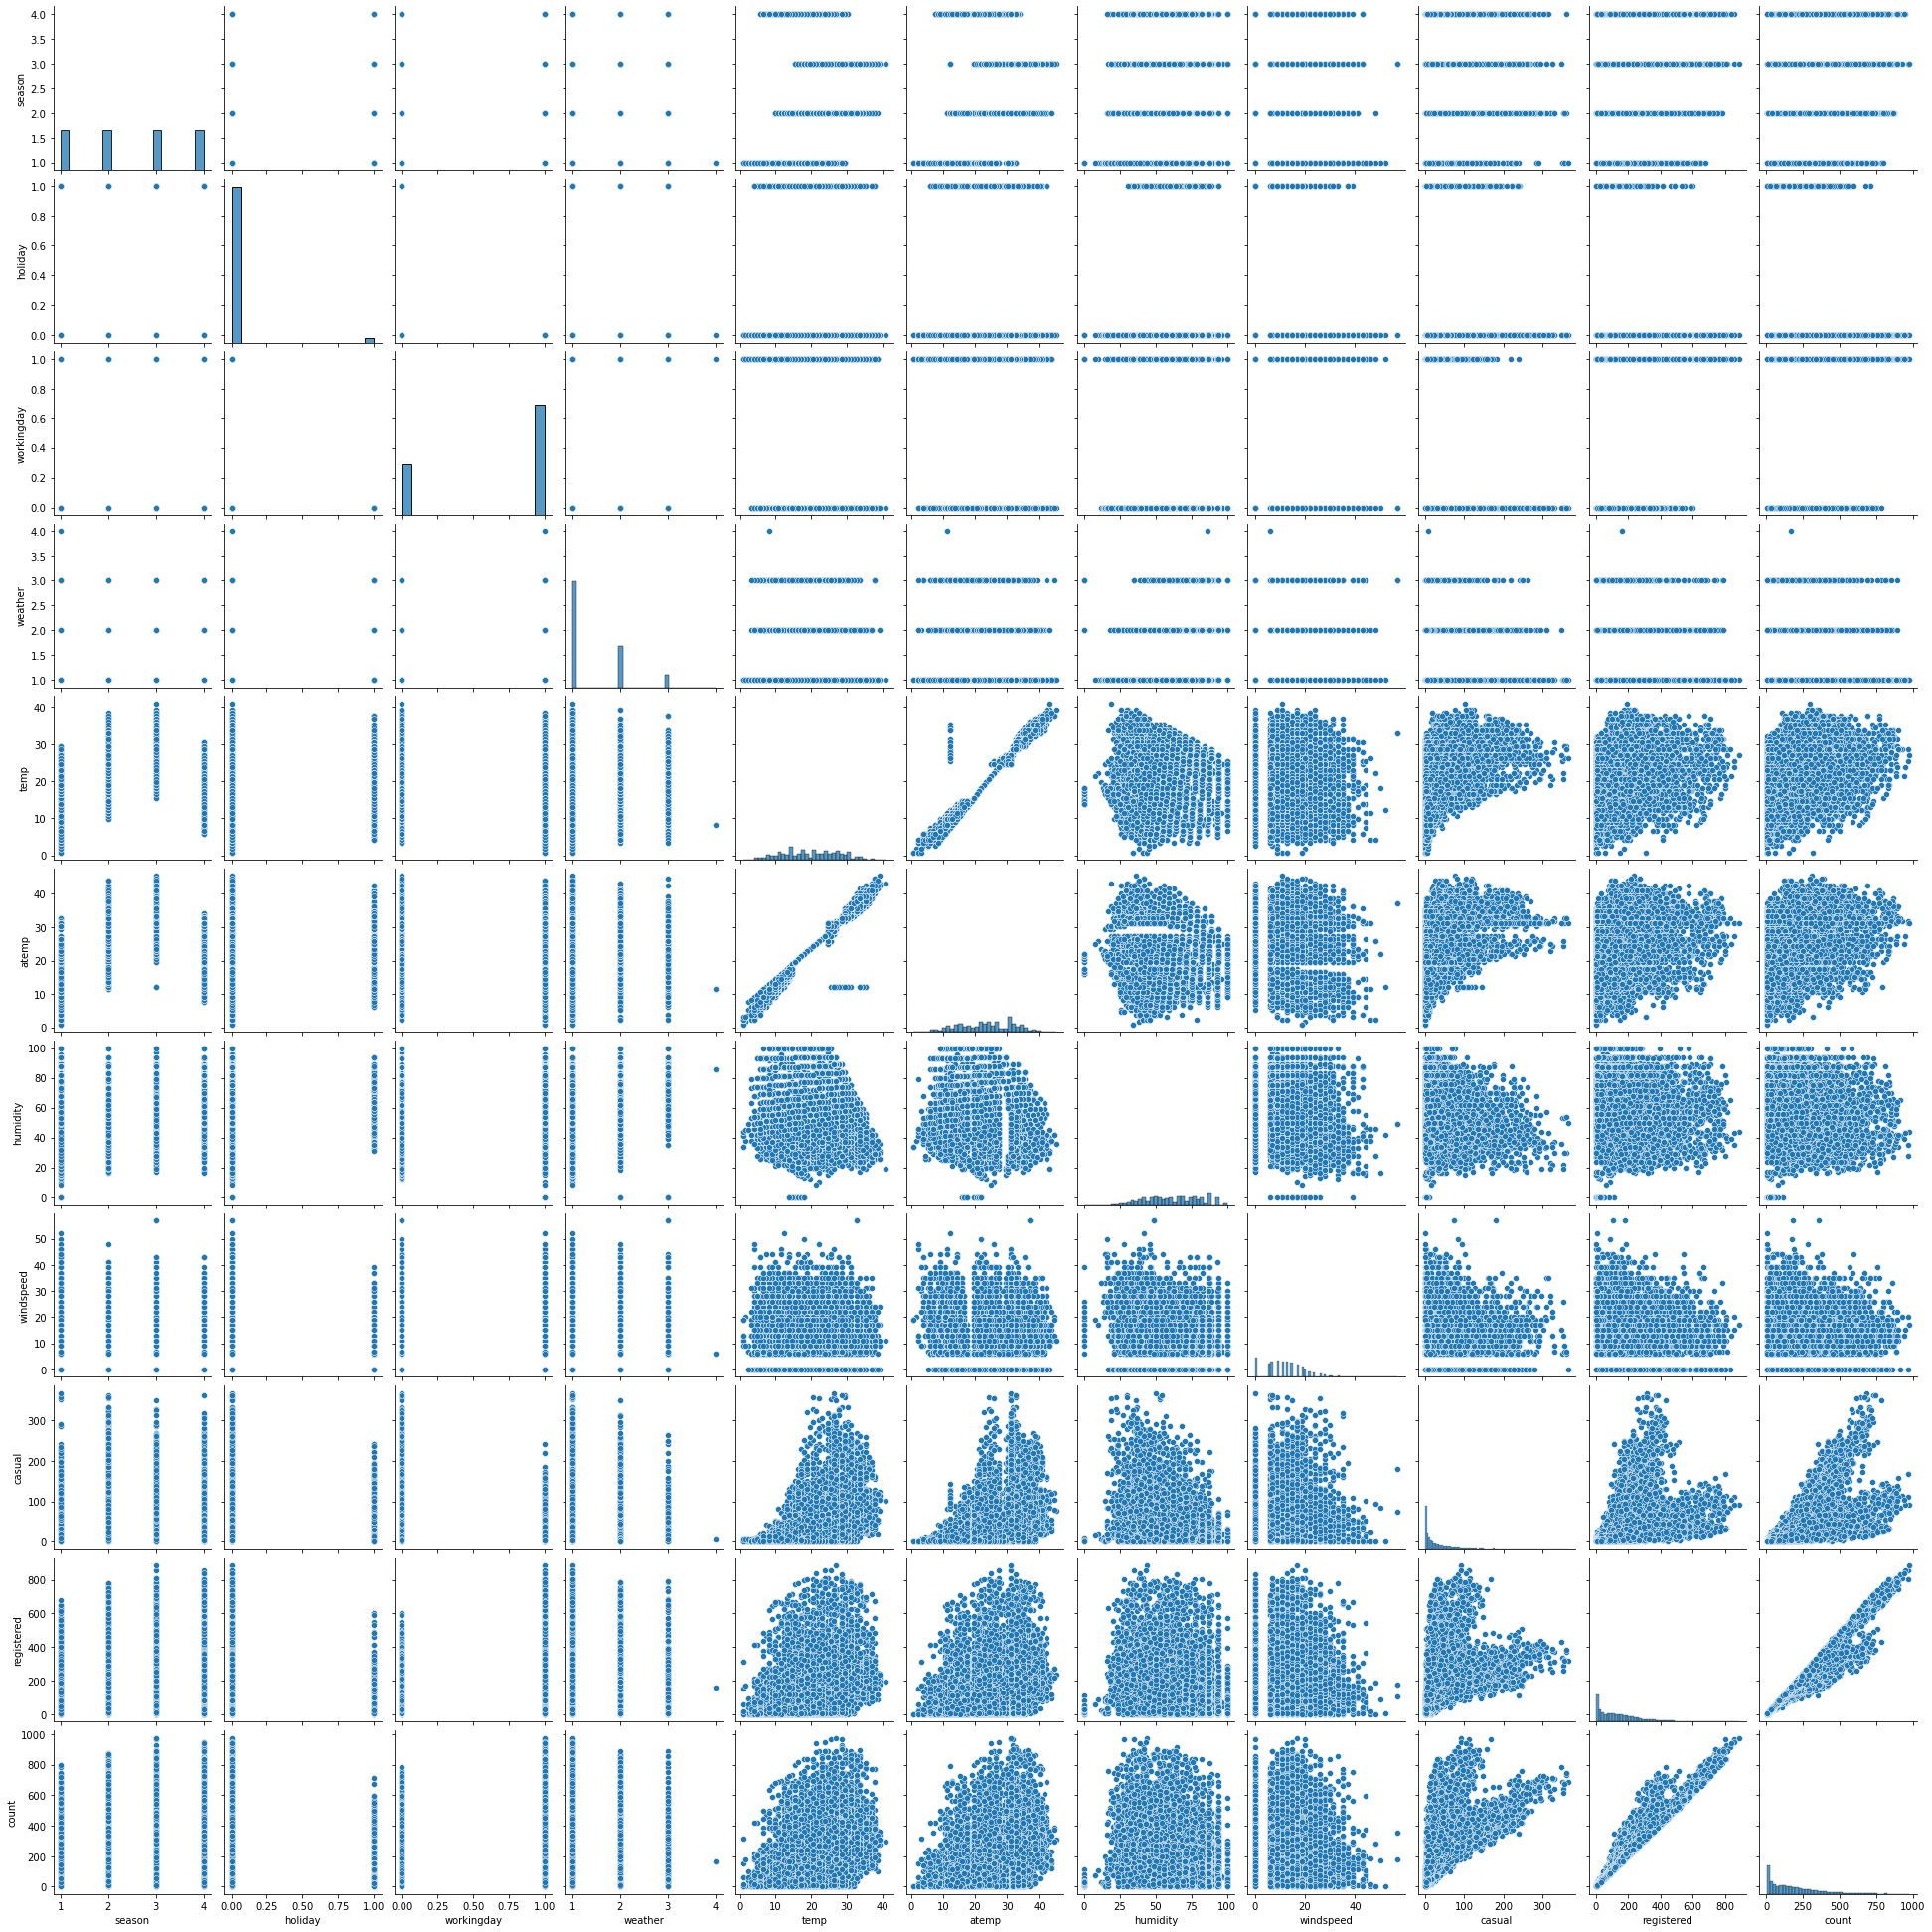

In [81]:
sns.pairplot(data=df)

### Converting features like temp,atemp,humidity,windspeed to bins.

In [82]:
data['temp_bin']=pd.cut(data['temp'],bins=[-1,10,20,30,45],labels=['low_temp','medium_temp','normal_temp','high_temp'])
data['atemp_bin']=pd.cut(data['atemp'],bins=[-1,10,20,30,46],labels=['low_atemp','medium_atemp','normal_atemp','high_temp'])
data['humidity_bin']=pd.cut(data['humidity'],bins=[-1,25,50,75,101],labels=['humidity<25%','humidity<50%','humidity<75%','humidity<100%'])
data['windspeed_bin']=pd.cut(data['windspeed'],bins=[-1,15,30,45,60],labels=['low_windspeed','medium_windspeed','high_windspeed','very_high_windspeed'])
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,year,month,day,day_name,hour,temp_bin,atemp_bin,humidity_bin,windspeed_bin
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,16,2011,January,1,Saturday,0,low_temp,medium_atemp,humidity<100%,low_windspeed
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,40,2011,January,1,Saturday,1,low_temp,medium_atemp,humidity<100%,low_windspeed
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,32,2011,January,1,Saturday,2,low_temp,medium_atemp,humidity<100%,low_windspeed
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,13,2011,January,1,Saturday,3,low_temp,medium_atemp,humidity<75%,low_windspeed
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,1,2011,January,1,Saturday,4,low_temp,medium_atemp,humidity<75%,low_windspeed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,...,336,2012,December,19,Wednesday,19,medium_temp,medium_atemp,humidity<50%,medium_windspeed
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,...,241,2012,December,19,Wednesday,20,medium_temp,medium_atemp,humidity<75%,medium_windspeed
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,...,168,2012,December,19,Wednesday,21,medium_temp,medium_atemp,humidity<75%,medium_windspeed
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,...,129,2012,December,19,Wednesday,22,medium_temp,medium_atemp,humidity<75%,low_windspeed


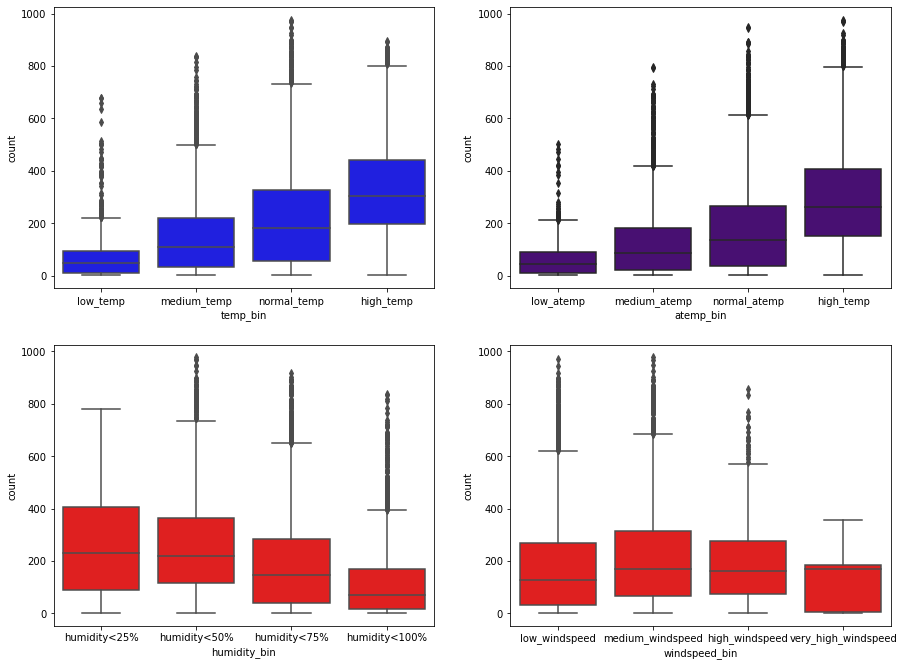

In [83]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
fig.subplots_adjust(top=1.2)
sns.boxplot(data=data, x="temp_bin",y='count',color="blue", ax=axis[0,0])
sns.boxplot(data=data, x="atemp_bin",y='count',color="indigo", ax=axis[0,1])
sns.boxplot(data=data, x="humidity_bin",y='count',color="red", ax=axis[1,0])
sns.boxplot(data=data, x="windspeed_bin",y='count',color="red", ax=axis[1,1])
plt.show()

### Chi-square test to check if Weather is dependent on the season

In [84]:
#H0:Weather is Independent on season
#H1:Weather is dependent on season
df_ws = pd.crosstab(df.weather,df.season,margins=True,margins_name='Total')
df_ws

season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
Total,2686,2733,2733,2734,10886


In [85]:
# Above weather 4 has less expected count so not include 4 
df_w=df[-(df['weather']==4)]

In [86]:
df_ws = pd.crosstab(df_w.weather,df_w.season,margins=True,margins_name='Total')
df_ws

season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
Total,2685,2733,2733,2734,10885


In [87]:
stat, p_value, dof, expected = stats.chi2_contingency(df_ws)
print('stat_value =',stat)
print('p_value    =',p_value)
print('dof        =',dof)
print('expected   =',expected)

stat_value = 46.10145731073249
p_value    = 6.664576536706683e-06
dof        = 12
expected   = [[ 1774.04869086  1805.76352779  1805.76352779  1806.42425356
   7192.        ]
 [  699.06201194   711.55920992   711.55920992   711.81956821
   2834.        ]
 [  211.8892972    215.67726229   215.67726229   215.75617823
    859.        ]
 [ 2685.          2733.          2733.          2734.
  10885.        ]]


In [88]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : Weather is Independent on season  ')
else:
    print('We reject the Null Hypothesis : Weather is dependent on season ')

We reject the Null Hypothesis : Weather is dependent on season 


<b>Insights :
###### --->  From the above observation we can see that p_value is less than significant value(0.05) so we reject null hypothesis. So, Weather is dependent on season

### Chi-square test to check if Weather is workingday on the season

In [89]:
#H0 = workingday is Independent on season
#H1 = workingday is dependent on season
df_count_season = pd.crosstab(df.workingday,df.season,margins=True,margins_name='Total')
df_count_season

season,1,2,3,4,Total
workingday,,,,,
0,858,840,888,888,3474
1,1828,1893,1845,1846,7412
Total,2686,2733,2733,2734,10886


In [90]:
stat, p_value, dof, expected = stats.chi2_contingency(df_count_season)
stat, p_value, dof, expected

(2.5708953973429574,
 0.9583429307736173,
 8,
 array([[  857.17104538,   872.16994305,   872.16994305,   872.48906853,
          3474.        ],
        [ 1828.82895462,  1860.83005695,  1860.83005695,  1861.51093147,
          7412.        ],
        [ 2686.        ,  2733.        ,  2733.        ,  2734.        ,
         10886.        ]]))

In [91]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : Workingday is Independent on season  ')
else:
    print('We reject the Null Hypothesis : Workingday is dependent on season ')

We Accept the Null Hypothesis : Workingday is Independent on season  


<b>Insights :
###### --->  From the above observation we can see that p_value is greater than significant value(0.05) so we accept null hypothesis. So, Workingday is Independent on season

### ANOVA

###  To check if No. of cycles rented is similar or different in different season

In [92]:
#H0 : count of bikes  is similar across various season
#Ha : count of bikes is different across various season
season_1 = df[df['season']==1]['count']
season_2 = df[df['season']==2]['count']
season_3 = df[df['season']==3]['count']
season_4 = df[df['season']==4]['count']

In [93]:
staic_value,p_value = stats.f_oneway(season_1,season_2,season_3,season_4)
print("P-Value     : ",p_value)
print("Staic_value : ",staic_value)

P-Value     :  6.164843386499654e-149
Staic_value :  236.94671081032106


In [94]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : count of bikes  is similar across various season ')
else:
    print('We reject the Null Hypothesis : count of bikes is different across various season ')

We reject the Null Hypothesis : count of bikes is different across various season 


<b>Insights :
###### --->  From the above observation we can see that p_value is less than significant value(0.05) so we reject null hypothesis. So, count of bikes is different across various season.

### To check if No. of cycles rented is similar or different in different weather.

In [95]:
#H0 : count of bikes  is similar across various weather
#Ha : count of bikes is different across various weather
weather_1 = df[df['weather']==1]['count']
weather_2 = df[df['weather']==2]['count']
weather_3 = df[df['weather']==3]['count']
weather_4 = df[df['weather']==4]['count']

In [96]:
staic_value,p_value = stats.f_oneway(weather_1,weather_2,weather_3,weather_4)
print("P-Value     : ",p_value)
print("Staic_value : ",staic_value)

P-Value     :  5.482069475935669e-42
Staic_value :  65.53024112793271


In [97]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : count of bikes  is similar across various weather ')
else:
    print('We reject the Null Hypothesis : count of bikes is different across various weather ')

We reject the Null Hypothesis : count of bikes is different across various weather 


<b>Insights :
###### --->  From the above observation we can see that p_value is less than significant value(0.05) so we reject null hypothesis. So, count of bikes is different across various weather.

### Recommendations
- Months like January, February and march sees less amount of booking to increase it we can provide a discount on the booking to
attract more customres.
- Most demand in evening time (16PM-19PM). so in this time period more number of cycle should be provided.
- More users are booking the bike when humidity is less so we can provide offer to add a refreshement during humid weather.
- In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is
higher as compared to other seasons.
- Working days sees more booking so we can provide an offer during weekends or holidays to bring in more bookings.
- With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
- In very low humid days, company should have less bikes in the stock to be rented.
- Whenever temprature is less than 10 or in very cold days, company should have less bikes.
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.
- Morning 0 - 6AM less amount of users so we can provide offers during that time